In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glacierml as gl
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm

In [2]:
dft = pd.read_csv('aggregated/sermeq_aggregated_bootstrap_predictions.csv')
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()
RGI = gl.RGI_loader()
RGI = RGI[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]

# drops = RGI[
# #     (RGI['Aspect'] < 0) | 
#     (RGI['Zmin'] < 0) |
#     (RGI['Zmax'] < 0) |
#     (RGI['Lmax'] < 0) 

# ].index
# RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
# RGI

ref = pd.merge(ref, RGI, on = 'RGIId')

ref = pd.merge(ref, dft, 
#                left_index = True, right_index = True)
on = [
    'RGIId'
])
ref = ref.rename(columns = {
    'Mean Thickness':'Edasi Mean Thickness'
})

ref['Farinotti Volume'] = (ref['Farinotti Mean Thickness'] / 1e3 )* ref['Area']

ref['region'] = ref['RGIId'].str[6:8]
ref['Edasi Volume'] = (ref['Edasi Mean Thickness'] / 1e3) * ref['Area']
ref['Volume Std Dev'] = (ref['Thickness Std Dev'] / 1e3 )* ref['Area']
ref = ref.reset_index()
ref = ref.drop('index', axis = 1)

ref['VE / VF'] = ref['Edasi Mean Thickness'] / ref['Farinotti Mean Thickness']
ref = ref.drop_duplicates()
ref = ref.dropna()
# sum(ref['volume km3'])
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,...,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Farinotti Volume,Edasi Volume,Volume Std Dev,VE / VF
0,RGI60-01.00001,21.182035,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,...,0.974259,1.721300e-27,8.942386,7.885554,21.626253,14.226050,0.007626,0.005343,0.002591,0.700685
1,RGI60-01.00002,30.519478,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,...,0.966729,9.273571e-31,5.944721,30.864175,39.845612,35.053523,0.017030,0.019708,0.002889,1.157254
2,RGI60-01.00003,35.518610,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,...,0.958427,9.373772e-34,5.443084,28.916565,37.291615,32.592387,0.059849,0.055724,0.008167,0.931073
3,RGI60-01.00004,53.077263,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,...,0.980968,6.835554e-24,6.095077,35.648320,45.116479,39.819495,0.195377,0.148425,0.019052,0.759686
4,RGI60-01.00005,47.519207,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,...,0.983602,3.243421e-22,6.543149,37.342863,47.168816,41.651334,0.122267,0.108346,0.013981,0.886144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,...,0.961854,1.399892e-32,17.077573,14.143986,39.744851,24.811207,0.000544,0.001126,0.000557,2.069687
215483,RGI60-19.02749,22.894110,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,...,0.980468,3.438035e-24,19.285031,23.007389,51.508082,35.736298,0.012981,0.021110,0.008378,1.626249
215484,RGI60-19.02750,60.874610,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,...,0.992775,3.735962e-14,28.705928,52.045433,94.994497,71.971468,0.250682,0.302111,0.090163,1.205158
215485,RGI60-19.02751,10.053704,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,...,0.988782,3.084626e-18,33.489690,66.231848,116.174542,88.635585,0.000111,0.001000,0.000279,9.038761


In [3]:
vol_f = ref['Farinotti Volume']
vol_e = ref['Edasi Volume']

data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']

x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

# Calculate the point density
xy = np.vstack([np.log10(vol_f),np.log10(vol_e)])

z = gaussian_kde(xy)(xy)

In [58]:
bins_x = np.logspace(np.log10(np.min(vol_f)), np.log10(np.max(vol_f)), 25)
bins_y = np.logspace(np.log10(np.min(vol_e)), np.log10(np.max(vol_e)), 25)


Drawing scatter plot...
Drawing done


Text(0.5, 0, 'Farinotti Volume (10^3 km^3)')

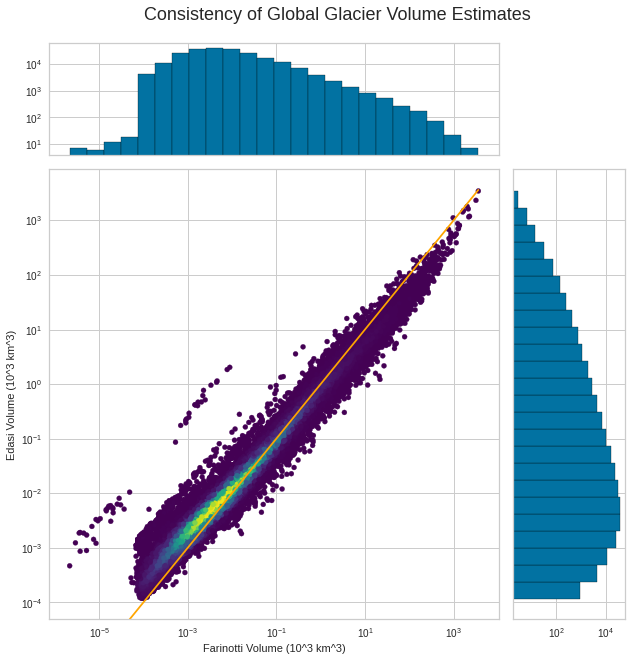

In [60]:
def scatter_hist(x, y, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(vol_f, vol_e, 
               c = (z), 
               s = 100,
               cmap = 'viridis',
               marker = '.')
    ax.plot(
        (0,(ref['Farinotti Volume'].max())),
        (0,ref['Farinotti Volume'].max()),
        '-',
        c = 'orange'

    )

    binwidth = 0.25
    xymax = max(np.max(np.abs(data_1)), np.max(np.abs(data_2)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim / -lim, lim / lim + binwidth, binwidth)
    bins = np.logspace(-6,4,25)
    
    ax_histx.hist(
        (vol_f), 
        bins = bins_x,
#         weights = np.ones((len(vol_f))) / len(vol_f),
#         color = 'indigo',
#         density = True,
        edgecolor = 'black',
        log = True
    )
    
    ax_histy.hist(
        (vol_e), 
        bins = bins_y, 
#         weights = np.ones((len(vol_e))) / len(vol_e),
#         color = 'viridis',
#         density = True,
#         cumulative = True,
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )

    
fig = plt.figure(figsize=(10,10))

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)



# Draw the scatter plot and marginals.
print('Drawing scatter plot...')
scatter_hist(
    vol_f, 
    vol_e,
    ax, 
    ax_histx,
    ax_histy,
)
# print(f'xymax = {xymax}')
# print(f'lim = {lim}')
print('Drawing done')
plt.suptitle('Consistency of Global Glacier Volume Estimates', fontsize=18, y=0.95
            )# ax_histx.set_yscale('log')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Edasi Volume (10^3 km^3)')
ax.set_xlabel('Farinotti Volume (10^3 km^3)')

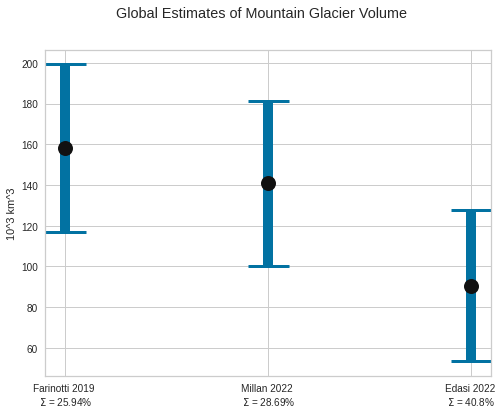

<Figure size 576x396 with 0 Axes>

In [6]:
plt.subplots(figsize = (8, 6))
plt.suptitle('Global Estimates of Mountain Glacier Volume')
y = (158.17,140.8,90.54894200610966)
yr = (41.03,40.4,36.94737323907368)

x = (f'Farinotti 2019 \n$\Sigma$ = {np.round(yr[0] / y[0] * 100, 2)}%',
     f'Millan 2022 \n$\Sigma$ = {np.round(yr[1] / y[1] * 100, 2)}%', 
     f'Edasi 2022 \n$\Sigma$ = {np.round(yr[2] / y[2] * 100, 2)}%')
plt.errorbar(x, y, yerr = yr, linestyle='None', 
             marker='o', markerfacecolor = 'k', markersize = 15, 
             ecolor = 'b', color = 'k', linewidth = 10, capsize = 20.5, capthick = 3
            )

plt.ylabel('10^3 km^3')
plt.grid(visible = True, axis = 'both')
plt.show()
plt.savefig('figs/err_bars/global.svg')
plt.savefig('figs/err_bars/global.eps')

In [7]:
df_errors = pd.DataFrame({
    'Model':['Farinotti Predicted', 'Farinotti Error',
             'Millan Predicted', 'Millan Error',
             'Edasi Predicted', 'Edasi Error'],
    'RGI region 01':[20.04, 5.19, 0.0000000001, 0.00000000001, 14.51405851256307, 4.200106930832922],
    'RGI region 02':[1.06, 0.27, 0.0000000001, 0.0000000001, 0.7368076357712061, 0.10716366825335849],
    'RGI region 03':[28.33,7.35, 25.4, 7.2, 14.223385621087361, 5.6915987722563335],
    'RGI region 04':[8.61, 2.23, 7.0, 2.1, 3.9562037706672766, 1.1327997441852944],
    'RGI region 05':[15.69, 4.07, 11.8, 3.7, 19.860819788591638, 8.80082448617973],
    'RGI region 06':[3.77, 0.98, 3.7, 0.9, 1.529159231505473, 0.6159972149067727],
    'RGI region 07':[7.47, 1.94, 7.0, 2.3, 3.8416873786339503, 0.8709770741164315],
    'RGI region 08':[0.30, 0.08, 0.29, 0.1, 0.2099510267955825, 0.017486443395156977],
    'RGI region 09':[14.64, 3.80, 15.5, 3.9, 5.097774974610174, 1.5629485530720626],
    'RGI region 10':[0.14, 0.04, 0.09, 0.05, 0.19229772501187994, 0.02115646507840827],
    'RGI region 11':[0.13, 0.03, 0.12, 0.05, 0.1164641987989334, 0.012931045187411103],
    'RGI region 12':[0.06, 0.02, 0.06, 0.03, 0.07623801702592378, 0.008753739071344174],
    'RGI region 13':[3.27, 0.85, 0.0000000001, 0.0000000001, 3.4238967609947473, 0.5313002298009859],
    'RGI region 14':[2.87, 0.74, 0.0000000001, 0.0000000001, 3.2329816977742243, 0.6370316544395048],
    'RGI region 15':[0.88, 0.23, 0.0000000001, 0.0000000001, 1.100249751294639, 0.1585639956722255],
#     '13 + 14 + 15':[7.02, 9.6 , 7.75712821006],
#     '13 + 14 + 15 sigma':[1.82 , 3.7, 1.32689587991],
    'RGI region 16':[0.10, 0.03, 0.07, 0.04, 0.07015330114413848, 0.023872009873914312],
    'RGI region 17':[5.34, 1.39, 5.9, 1.6, 3.497454137965523, 0.9071933979069083],
    'RGI region 18':[0.07, 0.02, 0.07, 0.03, 0.11741185857524947, 0.025949501775184985],
    'RGI region 19':[46.47, 12.06, 35.1, 9.1, 23.57945093884951, 16.200065769513607],
#     '19 sigma':[12.06,9.1, 16.200065769513607],
})


df_errors

,Model,RGI region 01,RGI region 02,RGI region 03,RGI region 04,RGI region 05,RGI region 06,RGI region 07,RGI region 08,RGI region 09,RGI region 10,RGI region 11,RGI region 12,RGI region 13,RGI region 14,RGI region 15,RGI region 16,RGI region 17,RGI region 18,RGI region 19
0,Farinotti Predicted,2.004000e+01,1.060000e+00,28.330000,8.610000,15.690000,3.770000,7.470000,0.300000,14.640000,0.140000,0.130000,0.060000,3.270000e+00,2.870000e+00,8.800000e-01,0.100000,5.340000,0.070000,46.470000
1,Farinotti Error,5.190000e+00,2.700000e-01,7.350000,2.230000,4.070000,0.980000,1.940000,0.080000,3.800000,0.040000,0.030000,0.020000,8.500000e-01,7.400000e-01,2.300000e-01,0.030000,1.390000,0.020000,12.060000
2,Millan Predicted,1.000000e-10,1.000000e-10,25.400000,7.000000,11.800000,3.700000,7.000000,0.290000,15.500000,0.090000,0.120000,0.060000,1.000000e-10,1.000000e-10,1.000000e-10,0.070000,5.900000,0.070000,35.100000
3,Millan Error,1.000000e-11,1.000000e-10,7.200000,2.100000,3.700000,0.900000,2.300000,0.100000,3.900000,0.050000,0.050000,0.030000,1.000000e-10,1.000000e-10,1.000000e-10,0.040000,1.600000,0.030000,9.100000
4,Edasi Predicted,1.451406e+01,7.368076e-01,14.223386,3.956204,19.860820,1.529159,3.841687,0.209951,5.097775,0.192298,0.116464,0.076238,3.423897e+00,3.232982e+00,1.100250e+00,0.070153,3.497454,0.117412,23.579451
5,Edasi Error,4.200107e+00,1.071637e-01,5.691599,1.132800,8.800824,0.615997,0.870977,0.017486,1.562949,0.021156,0.012931,0.008754,5.313002e-01,6.370317e-01,1.585640e-01,0.023872,0.907193,0.025950,16.200066


In [8]:
df_errors = df_errors.round(decimals = 2)

In [9]:
df_errors_text = df_errors.copy()

100%|██████████| 151/151 [00:00<00:00, 2258.05it/s]
19it [00:00, 2581.78it/s]
100%|██████████| 6/6 [00:00<00:00, 126.44it/s]
19it [00:00, 20.61it/s]


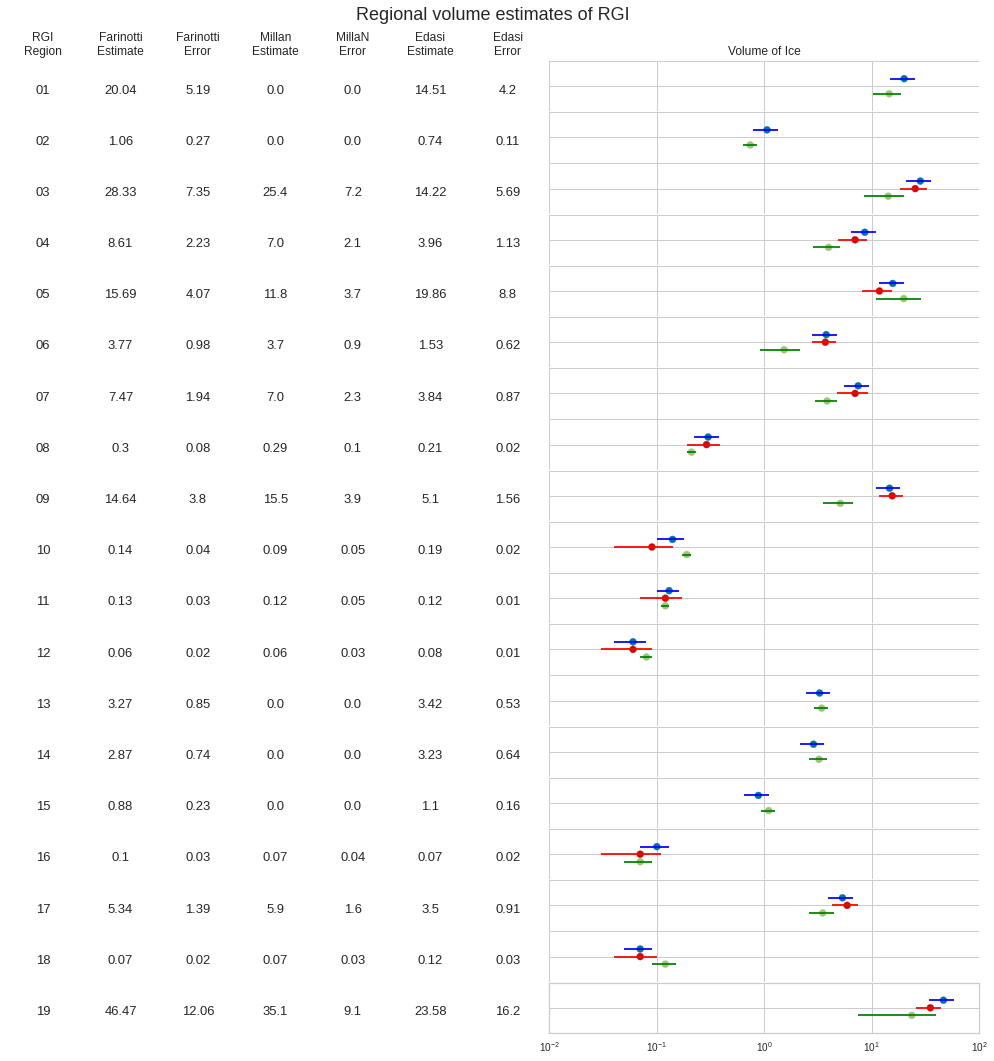

In [10]:
col1 = df_errors_text.columns[1:]

fig, axes = plt.subplots(
    ncols=8, nrows=19, figsize=(15,15),
    gridspec_kw={"width_ratios":[1,1,1,1,1,1,1,6]},
    sharex = True, sharey = True
                        )
fig.subplots_adjust(.05, 0.05, .95 , 0.95, wspace=0.05, hspace=0.015)
    

for ax in tqdm(axes.flatten()[:-1]):
    ax.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
    ax.ticklabel_format(useOffset=False, style="plain")
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    
    for _, s in ax.spines.items():
        s.set_visible(False)
        ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# border = fig.add_subplot(111)
# border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
# border.set_facecolor("None")

text_kw = dict(ha = 'center', va = 'bottom', size=13)

for i,ax in tqdm(enumerate(axes[:,0])):
#     print(i)
    ax.text(
        0.5,
        0.3, 
        col1[i][-2:], 
        transform = ax.transAxes, 
        **text_kw
    )
    
    ax.grid(visible = False)
# estimate and error
for n in tqdm(range(1, 7, 1)):
    for i, ax in enumerate(axes[:,n]):
        ax.text(
            0.5,
            0.3, 
            df_errors_text[col1[i]].loc[n-1],
            transform = ax.transAxes, 
            **text_kw
        )
        ax.grid(visible = False)
        

#         break
for i, ax in tqdm(enumerate(axes[:,7])):
    #farinoitt est & errors
    x_f = df_errors[col1[i]].iloc[0]
    x_f_err = df_errors[col1[i]].loc[1]
    
    
    # Millan est & errors
    x_m = df_errors[col1[i]].iloc[2]
    
    x_m_err = df_errors[col1[i]].loc[3]
    # Edasi est & errors
    x_e = df_errors[col1[i]].iloc[4]
    x_e_err = df_errors[col1[i]].loc[5]
    

    ax.scatter(
        x = ([x_f, x_m, x_e]), 
        y = [1.5, 0, -1.5],
        color = ['b', 'r', 'g'],
#         marker = '.'
        
    )

    ax.errorbar(
        x = x_f ,
        y =  1.5,
        ecolor = ['blue'],
#         elinewidth = 0.5,
        xerr = x_f_err,
        label = ['Farinotti']
    )
    ax.errorbar(
        x = x_m ,
        y = 0,
        ecolor = ['red'],
#         elinewidth = 0.5,
        xerr = x_m_err,
        label = ['Millan']
    )
    ax.errorbar(
        x = x_e ,
        y = -1.5,
        ecolor = ['green'],
#         elinewidth = 0.5,
        xerr = x_e_err,
        label = ['Edasi']
    )
    ax.set_xlim((0.01,100))
    ax.set_ylim((-5,5))
    ax.set_xscale('log')
#     ax.grid(visible = False)
#     break
plt.suptitle('Regional volume estimates of RGI',fontsize=18, y=1)
    
# for i, ax in tqdm(enumerate(axes[0,:])):
#     ax.set_title(df_errors['Model'].loc[i])
axes[0,0].set_title('RGI\nRegion')
axes[0,1].set_title('Farinotti\nEstimate')
axes[0,2].set_title('Farinotti\nError')
axes[0,3].set_title('Millan\nEstimate')
axes[0,4].set_title('MillaN\nError')
axes[0,5].set_title('Edasi\nEstimate')
axes[0,6].set_title('Edasi\nError')
axes[0,7].set_title('Volume of Ice')


# plt.tight_layout()
# plt.subplots_adjust(top = 1)
plt.show()

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


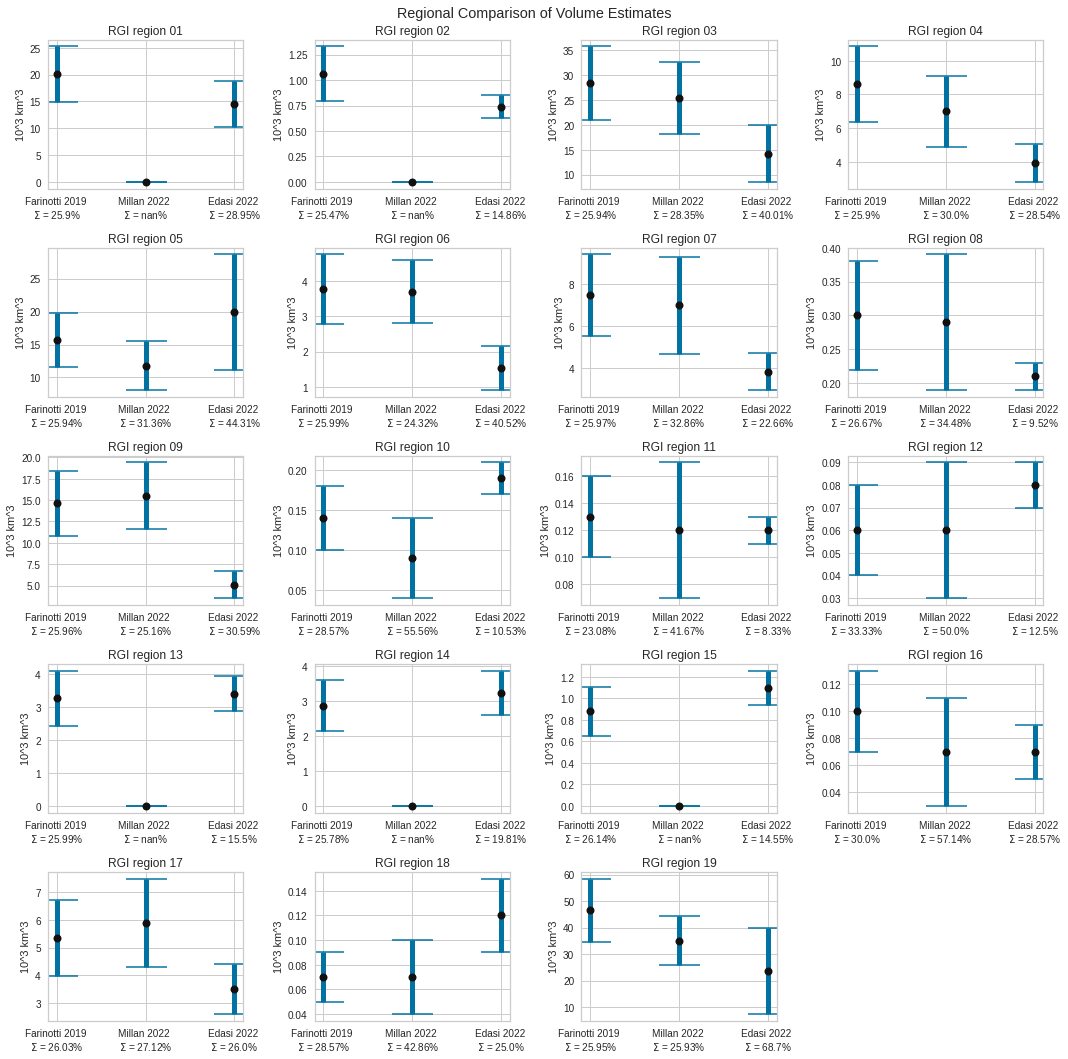

In [11]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
fig.patch.set_facecolor('w')
fig.suptitle('Regional Comparison of Volume Estimates')
             
# print(len(region_list))
for n, region in enumerate(df_errors.columns[1:]): 
#     print(df_errors[region])
    ax = plt.subplot(5,4,n+1)
    ax.set_title(region)
    y = (df_errors[region].loc[0], df_errors[region].loc[2], df_errors[region].loc[4],)
    yr = (df_errors[region].loc[1], df_errors[region].loc[3], df_errors[region].loc[5])
    
    farinotti_region_sigma = yr[0] / y[0] * 100
    millan_region_sigma = yr[1] / y[1] * 100
    edasi_region_sigma = yr[2] / y[2] * 100

    x = (f'Farinotti 2019 \n$\Sigma$ = {farinotti_region_sigma.round(2)}%',
         f'Millan 2022 \n$\Sigma$ = {millan_region_sigma.round(2)}%', 
         f'Edasi 2022 \n$\Sigma$ = {edasi_region_sigma.round(2)}%')
    yr = (df_errors[region].loc[1], df_errors[region].loc[3], df_errors[region].loc[5])
    plt.errorbar(x, y, yerr = yr, linestyle='None', 
                 marker='o', markerfacecolor = 'k', markersize = 8, 
                 ecolor = 'b', color = 'k', linewidth = 5, capsize = 20.5, capthick = 1.5
                )

    plt.ylabel('10^3 km^3')
    plt.grid(visible = True, axis = 'both')
    plt.tight_layout()
#     plt.savefig('figs/err_bars/regional.svg')
#     plt.savefig('figs/err_bars/regional.eps')